MAE: 0.2631578947368421
val_predictions: [0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1]


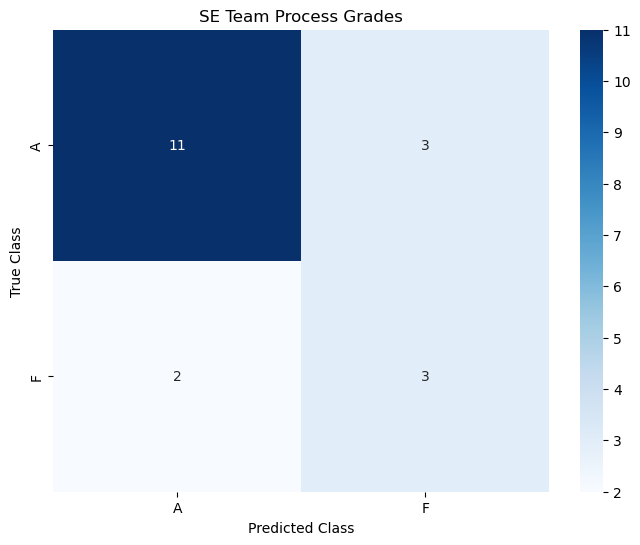

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

projectInterval = pd.read_csv('process_data/setapProcessT9.csv')

cols = ['averageResponsesByStudent', 'SE Process grade']

processesDf = pd.DataFrame(projectInterval, columns=cols)

label_encoder = LabelEncoder()
processesDf['SE Process grade'] = label_encoder.fit_transform(processesDf['SE Process grade'])

X = processesDf[['averageResponsesByStudent']]
y = processesDf['SE Process grade']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

team_performance_model_xg = xgb.XGBClassifier()
team_performance_model_xg.fit(train_X, train_y)

val_predictions = team_performance_model_xg.predict(val_X)

print('MAE:', mean_absolute_error(val_y, val_predictions))
print('val_predictions:', val_predictions)

cm = confusion_matrix(val_y, val_predictions)

class_names = label_encoder.classes_

cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('SE Team Process Grades')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()